In [1]:
!pip install pandas==1.3.3
!pip install numpy==1.21.2
!pip install scikit-learn==0.20.1

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
os.getcwd()

'/home/jovyan/demo/CAR PRICE PREDICTOR'

In [5]:
df = pd.read_csv('automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Using Simple Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
lm_hmpg = LinearRegression()
lm_hmpg

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Using Highway Miles Per Gallon and Car Price

In [7]:
X = df[['highway-mpg']]
Y = df['price']
lm_hmpg.fit(X,Y)
Yhat_hmpg=lm_hmpg.predict(X)
Yhat_hmpg

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682, 14593.03788682, 15414.77126514,
       15414.77126514, 17879.97140011, 20345.17153508, 20345.17153508,
       21988.63829172, -5128.5631929 ,  3088.77059031,  3088.77059031,
        4732.23734696,  7197.43748192, 13771.3045085 ,  7197.43748192,
        7197.43748192,  7197.43748192, 13771.3045085 , 13771.3045085 ,
       18701.70477843, -5950.29657123,  7197.43748192,  3910.50396864,
       10484.37099521, 10484.37099521, 10484.37099521, 10484.37099521,
       11306.10437353, 11306.10437353, 11306.10437353, 11306.10437353,
       15414.77126514, 12949.57113018, 14593.03788682, 14593.03788682,
       22810.37167004, 22810.37167004, 24453.83842668, 12949.57113018,
        7197.43748192,  7197.43748192,  7197.43748192,  7197.43748192,
       19523.43815675, 19523.43815675, 19523.43815675, 19523.43815675,
      

In [8]:
lm_hmpg.intercept_

38423.3058581574

In [9]:
lm_hmpg.coef_

array([-821.73337832])

## Price = 38423.31 - 821.73 x highway-mpg

## Using Engine Size and Car Price

In [10]:
lm_es = LinearRegression()
lm_es.fit(df[['engine-size']], df[['price']])
lm_es

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
lm_es.coef_

array([[166.86001569]])

In [14]:
lm_es.intercept_

array([-7963.33890628])

## Price=-7963.34 + 166.86*engine-size

In [15]:
Yhat_es=lm_es.predict(X)
Yhat_es

array([[-3458.11848261],
       [-3458.11848261],
       [-3624.9784983 ],
       [-2957.53843554],
       [-4292.41856107],
       [-3791.838514  ],
       [-3791.838514  ],
       [-3791.838514  ],
       [-4626.13859245],
       [-3124.39845123],
       [-3124.39845123],
       [-3291.25846692],
       [-3291.25846692],
       [-3791.838514  ],
       [-4292.41856107],
       [-4292.41856107],
       [-4626.13859245],
       [  880.24192536],
       [ -788.35823155],
       [ -788.35823155],
       [-1122.07826293],
       [-1622.65831001],
       [-2957.53843554],
       [-1622.65831001],
       [-1622.65831001],
       [-1622.65831001],
       [-2957.53843554],
       [-2957.53843554],
       [-3958.69852969],
       [ 1047.10194106],
       [-1622.65831001],
       [ -955.21824724],
       [-2290.09837277],
       [-2290.09837277],
       [-2290.09837277],
       [-2290.09837277],
       [-2456.95838846],
       [-2456.95838846],
       [-2456.95838846],
       [-2456.95838846],


In [29]:
df[["peak-rpm","highway-mpg","horsepower", "curb-weight", "engine-size","price"]].corr()

,peak-rpm,highway-mpg,horsepower,curb-weight,engine-size,price
peak-rpm,1.000000,-0.058598,0.107885,-0.279361,-0.256733,-0.101616
highway-mpg,-0.058598,1.000000,-0.804575,-0.794889,-0.679571,-0.704692
horsepower,0.107885,-0.804575,1.000000,0.757976,0.822676,0.809575
curb-weight,-0.279361,-0.794889,0.757976,1.000000,0.849072,0.834415
engine-size,-0.256733,-0.679571,0.822676,0.849072,1.000000,0.872335
price,-0.101616,-0.704692,0.809575,0.834415,0.872335,1.000000


## Using Multiple Linear Regression (using factors with high correlation) <br>
Factors used-> <br>
Horsepower <br>
Curb Weight <br>
Engine Size <br>
Highway mpg <br>

In [30]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm_mlr = LinearRegression()
lm_mlr.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
lm_mlr.intercept_

-15806.62462632922

In [32]:
lm_mlr.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

## Price = -15806.62 + 53.49 x horsepower + 4.70 x curb-weight + 81.53 x engine-size + 36.05 x highway-mpg


## Regression Plots

(0, 48145.98883510326)

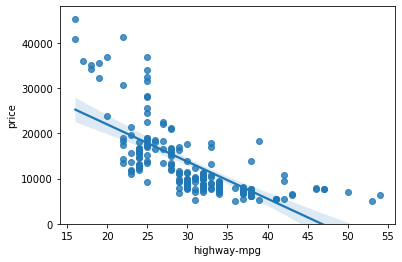

In [34]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47761.250427313105)

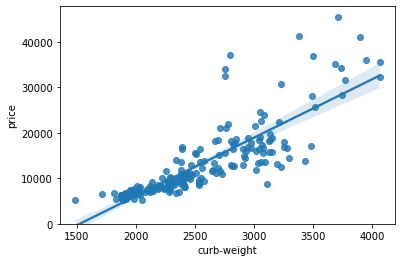

In [35]:
sns.regplot(x="curb-weight", y="price", data=df)
plt.ylim(0,)

(0, 47534.403677322945)

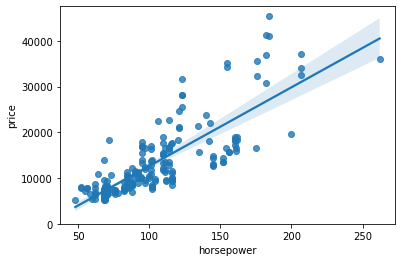

In [36]:
sns.regplot(x="horsepower", y="price", data=df)
plt.ylim(0,)

(0, 53317.5125326284)

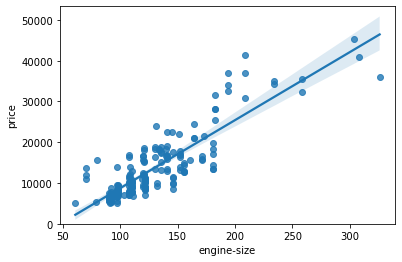

In [37]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

## Residual Plots

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


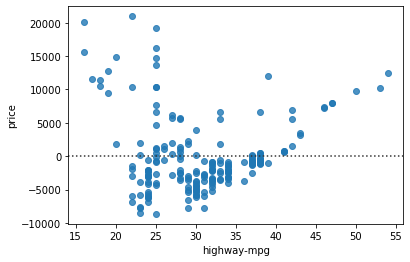

In [38]:
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

## Checking Fit

In [44]:
Y_hat = lm_mlr.predict(Z)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


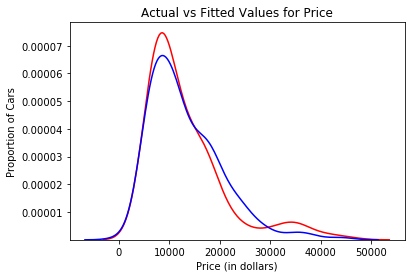

In [47]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## Polynomial Regression

In [78]:
# Plotting Function
def PlotPoly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [79]:
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


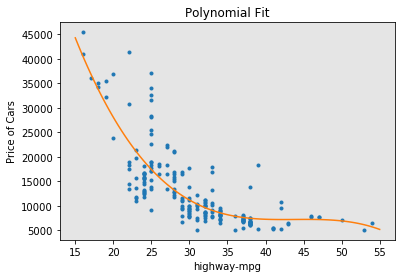

In [80]:
PlotPoly(p, x, y, 'highway-mpg')

In [52]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

## Pipeline

In [55]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [56]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [57]:
ypipe=pipe.predict(Z)
ypipe

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385, 10510.56542385, 15845.70697835,
       16068.03816037, 18547.43547305, 25222.41976123, 25176.06409341,
       26518.01037743,  5896.19728097,  6225.67595805,  6265.22601565,
        5976.20889391,  5832.72306295, 10109.23396371,  6061.05969767,
        6118.14411398,  6118.14411398, 10042.92800648, 11301.10641037,
       18336.04622938,  7336.72885437,  6420.49643279,  5174.21296336,
        6619.35236359,  6652.09244229,  6765.45204951,  6795.56233742,
        8796.64497511,  8948.23637645,  8991.91184621,  9194.18038695,
       10928.27635866, 10052.96792101,  9660.68466801, 12124.39546671,
       36318.61803898, 36318.61803898, 41642.8179005 ,  5912.27956733,
        5928.15567673,  5941.11734652,  6046.17348651,  6059.47585172,
       10195.17246527, 10195.17246527, 10183.58560528, 15943.91103394,
      

## Evaluating MSE and R^2 errors

In [59]:
# For Highway Mile per Gallon and Price model
print('The R-square is: ', lm_hmpg.score(X, Y))

The R-square is:  0.4965911884339176


In [61]:
mse_hmpg = mean_squared_error(df['price'], Yhat_hmpg)
print('The mean square error of price and predicted value is: ', mse_hmpg)

The mean square error of price and predicted value is:  31635042.944639888


In [62]:
# For Multiple Linear Regression Model
print('The R-square is: ', lm_mlr.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [63]:
Y_predict_multifit = lm_mlr.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [67]:
# For Polynomial Fit
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [66]:
mean_squared_error(df['price'], p(x))

20474146.426361218